In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
#Finding the missing values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Dropping missing values
data=data.dropna()

In [7]:
#Correcting the name of the columns
data.columns=data.columns.str.replace(' ','_')

In [8]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [9]:
#Size variables come insconsitency in it, so dropping that data too
data.loc[data['Size']=='Varies with device'].shape

(1637, 13)

In [10]:
data = data[data.Size != 'Varies with device']

In [11]:
# Creating function for converting data
def mutliply_fun (x):
    if 'M' in x:
        return float(x.replace('M','')) * 1000
    elif 'k' in x:
        return float(x.replace('k',''))
    else:
        return float(x)

In [12]:
#Using apply function for final data
data.Size = data.Size.astype(str).apply(mutliply_fun)

In [13]:
#Converting Reviews column into float
data['Reviews']=data.Reviews.astype(float)

In [14]:
#Replacing + with space in Installs column
data.loc[:,['Installs']]=data.Installs.str.replace('+','')

<ipython-input-14-3f1f546f2a9e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.loc[:,['Installs']]=data.Installs.str.replace('+','')


In [15]:
#Replacing , with space in Installs column
data.loc[:,['Installs']]=data.Installs.str.replace(',','')

In [16]:
#Converting Installs column into float
data['Installs']=data.Installs.astype(float)

In [17]:
# Replacing $ with space in Installs column
data.loc[:,['Price']]=data.Price.str.replace('$','').astype(float)

<ipython-input-17-00db466c221f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.loc[:,['Price']]=data.Price.str.replace('$','').astype(float)


In [18]:
data.shape

(7723, 13)

In [19]:
# Taking only that data which has rating less than 5
data = data[data.Rating <= 5]

In [20]:
data.shape

(7723, 13)

In [21]:
# Taking only that data which has number of reviews less than Installs
data.drop(data.index[data['Reviews'] > data['Installs']], axis = 0,inplace=True)

In [22]:
data.shape

(7717, 13)

In [23]:
data[['App','Type']] [(data['Type'] == 'Free') & (data['Price']>0)]

,App,Type


C:\Users\divyansh.singhal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

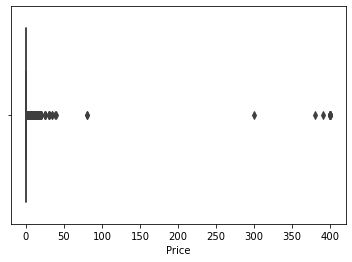

In [24]:
sns.boxplot(data.Price)

#### Yes there are many Outliers, above 300 can be considered as outliers

C:\Users\divyansh.singhal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

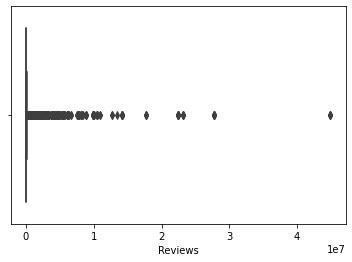

In [25]:
sns.boxplot(data.Reviews)

#### In Reviews also there are many outliers

C:\Users\divyansh.singhal\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

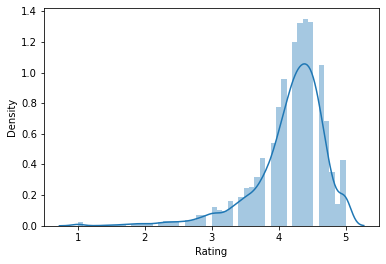

In [26]:
sns.distplot(data.Rating)

#### It is neagtively skewed and yes it is more towards higher ratings 

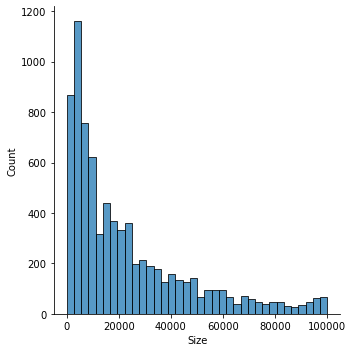

In [27]:
sns.displot(data.Size)

In [28]:
data[data['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


####  A price of 200 and above for an application on the Play Store is very high and suspicious!

In [29]:
data=data[data['Price'] < 200]

#### Droping records having more than 2 million reviews.

In [30]:
data=data[data['Reviews'] < 2000000]

In [31]:
data.shape

(7483, 13)

In [32]:
import numpy as np
print('10th Percentile - ',np.percentile(data['Installs'],10))
print('25th Percentile - ',np.percentile(data['Installs'],25))
print('50th Percentile - ',np.percentile(data['Installs'],50))
print('70th Percentile - ',np.percentile(data['Installs'],70))
print('90th Percentile - ',np.percentile(data['Installs'],90))
print('95th Percentile - ',np.percentile(data['Installs'],95))
print('99th Percentile - ',np.percentile(data['Installs'],99))

10th Percentile -  1000.0
25th Percentile -  10000.0
50th Percentile -  100000.0
70th Percentile -  1000000.0
90th Percentile -  10000000.0
95th Percentile -  10000000.0
99th Percentile -  50000000.0


#### We can clearly see that most of the data is below 99th percentile so se will take only that data

In [33]:
data=data[data.Installs < data.Installs.quantile(.99)]

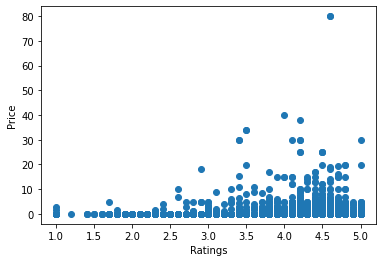

In [34]:
plt.scatter(data.Rating,data.Price)
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

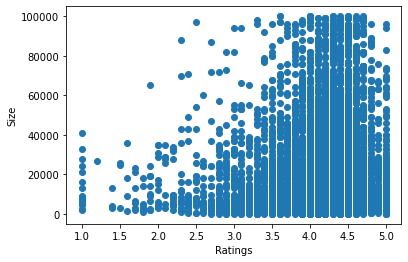

In [35]:
plt.scatter(data.Rating,data.Size)
plt.xlabel('Ratings')
plt.ylabel('Size')
plt.show()

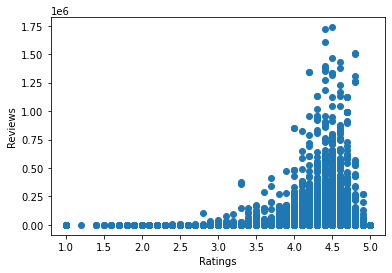

In [36]:
plt.scatter(data.Rating,data.Reviews)
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

#### From this scatter plot we can infer that more reviews mean better ratins

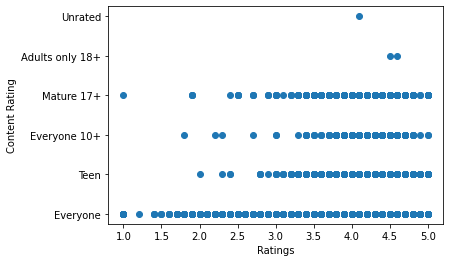

In [37]:
plt.scatter(data.Rating,data.Content_Rating)
plt.xlabel('Ratings')
plt.ylabel('Content Rating')
plt.show()

#### Teen,Everyone 10+,Mature 17+ have better ratings then everyone

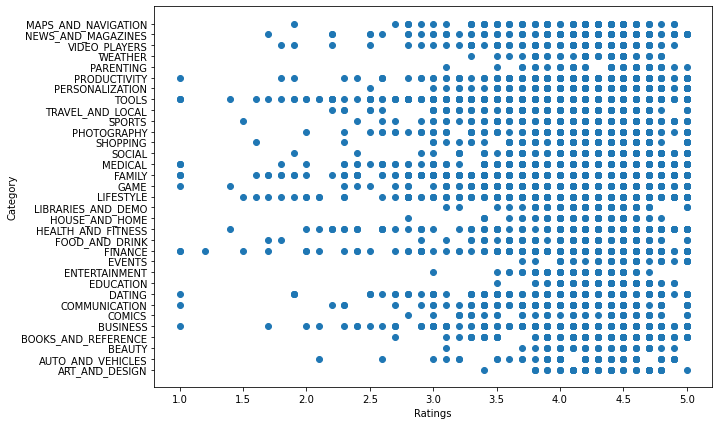

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(data.Rating,data.Category)
plt.xlabel('Ratings')
plt.ylabel('Category')
plt.show()

#### Events,Weather and Parenting are the best rated apps

In [39]:
# Creating Copy of our data
inp1 = data

In [40]:
#Applying Log transformation on Installs column
inp1['Installs']=np.log(inp1['Installs'])

In [41]:
#Applying Log transformation on Reviews column
inp1.loc[:,'Reviews']=np.log(inp1['Reviews'])

In [42]:
# Dropping unneccesary columns
inp1=inp1.drop(['App', 'Last_Updated','Current_Ver','Android_Ver'], axis = 1)

In [43]:
#Creating Dummy variables
inp2=pd.get_dummies(inp1,drop_first=True)

In [44]:
#Creating dependent and independent variables
X = inp2.drop(['Rating'],axis=1)
y = inp2['Rating']
#Dividing data into train and test test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()

In [47]:
reg.fit(X_train,y_train)

LinearRegression()

In [48]:
reg.score(X_test,y_test)

0.11146119417697964

In [49]:
    y_pred = reg.predict(X_test)
    y_pred

array([4.27569526, 4.33366619, 4.34880972, ..., 4.44923303, 4.64208624,
       4.04593485])

In [50]:
reg.score(X_train,y_train)

0.15866459698837554